# Black-box classifier
## Imports

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [16]:
df = pd.read_csv('../data/augemented_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,issuercountry,txvariantcode,issuer_id,amount,currencycode,shoppercountry,interaction,verification,cvcresponse,creationdate_stamp,accountcode,mail_id,ip_id,card_id,label,mean_amount_per_date,mean_amount_per_car,mean_amount_per_mail,mean_amount_per_ip
0,18.0,10.0,465859.0,4370.0,3.0,26.0,1.0,2.0,1.0,1.444255e+09,0.0,32318.0,45370.0,1.0,0.0,4370.0,4370.0,4370.0,4370.000000
1,68.0,4.0,438088.0,13850.0,2.0,134.0,1.0,1.0,0.0,1.438942e+09,1.0,1567.0,33933.0,2.0,0.0,13850.0,13850.0,13850.0,13850.000000
2,18.0,12.0,552213.0,6595.0,3.0,26.0,1.0,1.0,1.0,1.437858e+09,0.0,64936.0,255836.0,3.0,0.0,6595.0,6595.0,6595.0,6595.000000
3,18.0,10.0,492181.0,2895.0,3.0,26.0,1.0,1.0,1.0,1.443369e+09,0.0,95340.0,242162.0,4.0,0.0,2895.0,2895.0,2895.0,2895.000000
4,55.0,9.0,493136.0,223900.0,0.0,69.0,1.0,1.0,0.0,1.442077e+09,3.0,250940.0,70404.0,5.0,0.0,223900.0,223900.0,223900.0,163738.333333


## Split data and label

In [17]:
X = np.asmatrix(df.drop(['label'], axis=1))
y = df['label']
print(X.shape)
print(y.shape)

(236698, 18)
(236698,)


## Classification: Balanced bagging classifier (10 subsets)

### Run classifier

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 ratio='auto',
                                 replacement=False,
                                 random_state=0)

y_score = cross_val_predict(bbc,X,y,cv=10, method='predict_proba')

### Output confusion matrix

In [19]:
from collections import Counter

# print confusion matrix
y_pred = (y_score[:,1] > 0.5).astype(int)
print(confusion_matrix(y,y_pred))
print(sorted(Counter(y_pred).items()))

[[217106  19247]
 [    71    274]]
[(0, 217177), (1, 19521)]


### Output Precision-Recall Curve

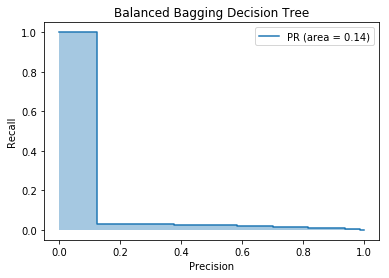

In [20]:
from sklearn.metrics import precision_recall_curve, auc

# calculate PR curve values
prec, rec, thresholds = precision_recall_curve(y, y_score[:,1])

# compute area under PR curve
area =  auc(prec, rec)

# fill area under curve
plt.fill_between(rec, prec, step="mid", alpha=0.4)

# plot PR curve
plt.step(rec, prec, where='mid', label='PR (area = {0:0.2f})'.format(area))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Balanced Bagging Decision Tree')
plt.legend()
plt.savefig(('pr_curve_black_box_%f' % np.random.rand()).replace('.',''), ext='png', pdi=150)

### Output all metrics

In [21]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      0.92      0.79      0.96      0.85      0.74    236353
        1.0       0.01      0.79      0.92      0.03      0.85      0.72       345

avg / total       1.00      0.92      0.79      0.96      0.85      0.74    236698

